# Problem Statement

Your task at hand is to build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends.

You are provided with total energy demand on an hourly basis for the past 9 years from March 2008 to Dec 2018 in the training set. You need to forecast the total energy demand on an hourly basis for the next 3 years from 2019 to 2021 in the test set.

# Read Dataset & import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
A = pd.read_csv("C:/Users/I A T Laptop L.L.C/Desktop/Green_Energy/train_IxoE5JN.csv")
B = pd.read_csv("C:/Users/I A T Laptop L.L.C/Desktop/Green_Energy/test_WudNWDM.csv")

# Data Previewing

In [4]:
A.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [5]:
A.tail(5)

,row_id,datetime,energy
94987,94988,2018-12-31 19:00:00,2528.4468
94988,94989,2018-12-31 20:00:00,2461.8836
94989,94990,2018-12-31 21:00:00,2365.9944
94990,94991,2018-12-31 22:00:00,2342.9428
94991,94992,2018-12-31 23:00:00,2180.2176


# Datetime column to index convercsion

In [6]:
A.datetime = pd.to_datetime(A.datetime)
A.datetime

0       2008-03-01 00:00:00
1       2008-03-01 01:00:00
2       2008-03-01 02:00:00
3       2008-03-01 03:00:00
4       2008-03-01 04:00:00
                ...        
94987   2018-12-31 19:00:00
94988   2018-12-31 20:00:00
94989   2018-12-31 21:00:00
94990   2018-12-31 22:00:00
94991   2018-12-31 23:00:00
Name: datetime, Length: 94992, dtype: datetime64[ns]

In [7]:
A.head(5)

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [8]:
A.index = A.datetime

In [9]:
A.head(3)

,row_id,datetime,energy
datetime,,,
2008-03-01 00:00:00,1,2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,2,2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,3,2008-03-01 02:00:00,1056.247500


In [10]:
A = A.drop(labels=["datetime"],axis=1)
A.head(3)

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500


In [11]:
A = A.drop(labels=["row_id"],axis=1)
#A.columns = ["datetime","energy"]

In [12]:
A.head(3) # Made index as a dimension of time

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500


# Misssing data treatment

In [13]:
A.isna().sum()

energy    1900
dtype: int64

In [14]:
X = A.energy.mean()
A.energy = A.energy.fillna(X)

In [15]:
A.isna().sum()

energy    0
dtype: int64

In [16]:
A.head(3)

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500


# Plot Time Series

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='datetime'>

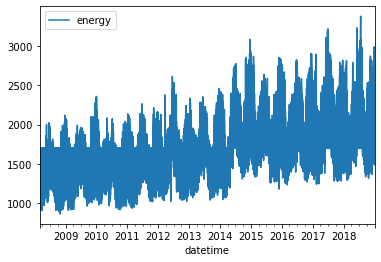

In [18]:
A.plot()

# Decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model='multiplicative')

In [20]:
original= Q.observed

In [21]:
trend = Q.trend

In [22]:
seasonal =Q.seasonal

In [23]:
seasonal

datetime
2008-03-01 00:00:00    0.948146
2008-03-01 01:00:00    0.899752
2008-03-01 02:00:00    0.870764
2008-03-01 03:00:00    0.852856
2008-03-01 04:00:00    0.847904
                         ...   
2018-12-31 19:00:00    1.084177
2018-12-31 20:00:00    1.081826
2018-12-31 21:00:00    1.080417
2018-12-31 22:00:00    1.063714
2018-12-31 23:00:00    1.012560
Name: seasonal, Length: 94992, dtype: float64

In [24]:
Error = Q.resid

# Plotting

<AxesSubplot:xlabel='datetime'>

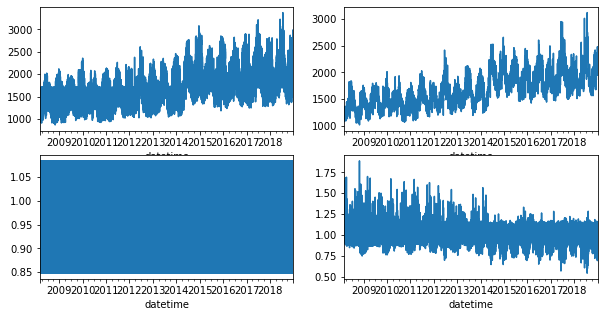

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
original.plot()
plt.subplot(2,2,2)
trend.plot()
plt.subplot(2,2,3)
seasonal.plot()
plt.subplot(2,2,4)
Error.plot()

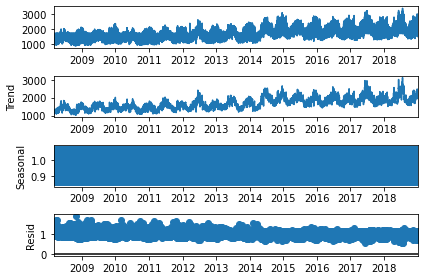

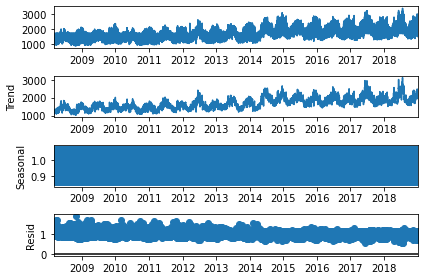

In [26]:
Q.plot()

<AxesSubplot:xlabel='datetime'>

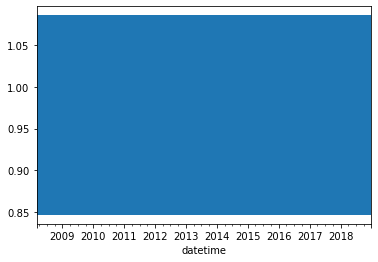

In [27]:
seasonal.plot()

# Seasonal decomposition plots yearly,monthly,Weekly,daily

In [28]:
seasonal_1years= seasonal.iloc[:8760:] # 365 days x 24 hours = 8760 hours i.e for 1 year plot

<AxesSubplot:xlabel='datetime'>

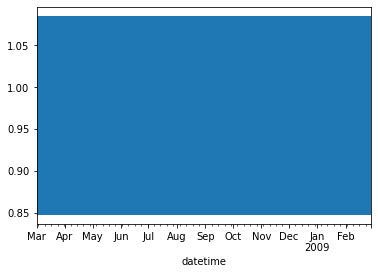

In [29]:
seasonal_1years.plot()

In [30]:
seasonal_1month= seasonal.iloc[:730:] # 8760 days / 12 months = 730 hours i.e for 1 month plot

<AxesSubplot:xlabel='datetime'>

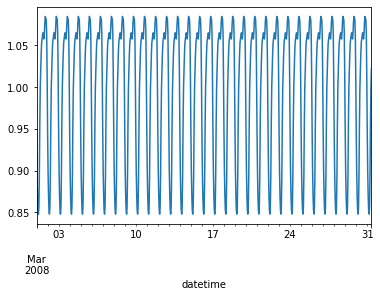

In [31]:
seasonal_1month.plot()

In [32]:
seasonal_1day= seasonal.iloc[:26:] # 730 hours / 30 days = 24 hours i.e for 1 day plot

<AxesSubplot:xlabel='datetime'>

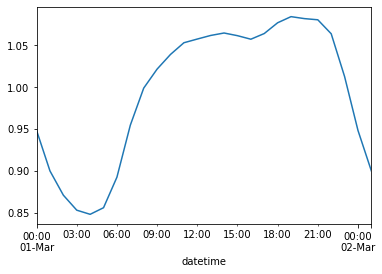

In [33]:
seasonal_1day.plot()

In [34]:
seasonal_1week= seasonal.iloc[:144:] # 24 hrsx 6 days= 144 hours i.e for 1 week plot

<AxesSubplot:xlabel='datetime'>

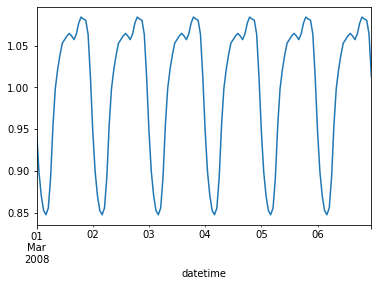

In [35]:
seasonal_1week.plot()

In [36]:
144+144 #2 weeks

288

In [37]:
94992-288 # for last 2 weeks in 2019

94704

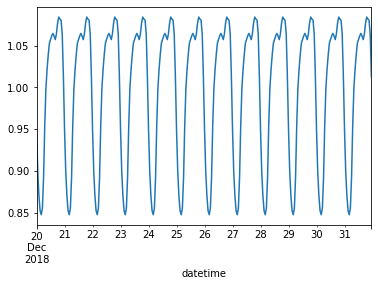

In [38]:
seasonal_2019_last2weeks=seasonal.iloc[94704:94992].plot()

# Check stationary time series using rolling mean

In [39]:
RM = A.rolling(window=8760).mean()

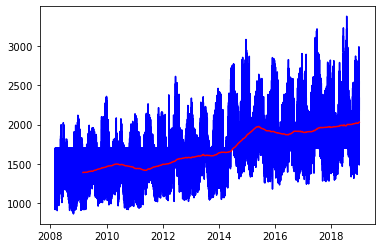

In [40]:
plt.plot(A,c="blue")
plt.plot(RM,c="red")

In [41]:
RM_2week =seasonal.iloc[94704:94992].rolling(window=8760).mean()

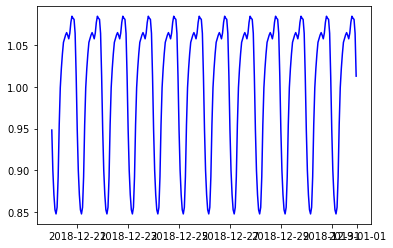

In [42]:
plt.plot(seasonal.iloc[94704:94992],c="blue")
plt.plot(RM_2week,c="red")

# Attempt 1 for stationary conversion

In [43]:
from numpy import log
LG = log(A)
LGRM = LG.rolling(window=8760).mean()

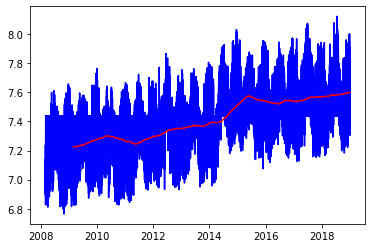

In [44]:
plt.plot(LG,c="blue")
plt.plot(LGRM,c="red")

# Attempt 2(square root)

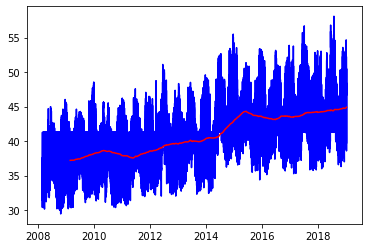

In [45]:
from numpy import sqrt
SR = sqrt(A)
SRRM = SR.rolling(window=8760).mean()
plt.plot(SR,c="blue")
plt.plot(SRRM,c="red")

# Attempt 3(log-RM(log))

In [46]:
LG = log(A)
LGRM = LG.rolling(window=8760).mean()

diff_LG_RM = LG-LGRM
RM_diff_LG_RM = diff_LG_RM.rolling(window=8760).mean()

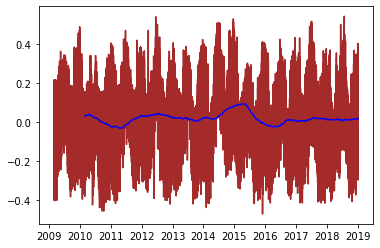

In [47]:
plt.plot(diff_LG_RM,c="brown")
plt.plot(RM_diff_LG_RM,c="blue")

# Divide Data in training and testing set

In [48]:
T = diff_LG_RM[diff_LG_RM.energy.isna()==False] # training set T

In [49]:
diff_LG_RM.shape

(94992, 1)

In [50]:
T.shape # total data without any missing values

(86233, 1)

In [51]:
T

,energy
datetime,
2009-02-28 23:00:00,-0.142947
2009-03-01 00:00:00,-0.213073
2009-03-01 01:00:00,-0.281504
2009-03-01 02:00:00,-0.321576
2009-03-01 03:00:00,-0.354591
...,...
2018-12-31 19:00:00,0.233765
2018-12-31 20:00:00,0.207057
2018-12-31 21:00:00,0.167301


In [52]:
T.shape[0]*0.6 #split of 60% for training 

51739.799999999996

In [53]:
train_data =T[0:51740]
test_data =T[51740:]

In [54]:
train_data.shape

(51740, 1)

In [55]:
test_data.shape # test data

(34493, 1)

In [56]:
51740+34493

86233

In [57]:
test_data

,energy
datetime,
2015-01-24 19:00:00,0.250446
2015-01-24 20:00:00,0.210616
2015-01-24 21:00:00,0.193345
2015-01-24 22:00:00,0.165679
2015-01-24 23:00:00,0.093166
...,...
2018-12-31 19:00:00,0.233765
2018-12-31 20:00:00,0.207057
2018-12-31 21:00:00,0.167301


# Create an autoregression forecasting model

In [58]:
from statsmodels.tsa.ar_model import AR
ar = AR(train_data).fit()

pred = ar.predict(start="2015-01-24 19:00:00",end="2018-12-31 23:00:00")

C:\Users\I A T Laptop L.L.C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [59]:
pred

2015-01-24 19:00:00    0.265599
2015-01-24 20:00:00    0.248449
2015-01-24 21:00:00    0.226948
2015-01-24 22:00:00    0.189865
2015-01-24 23:00:00    0.122091
                         ...   
2018-12-31 19:00:00    0.029572
2018-12-31 20:00:00    0.029572
2018-12-31 21:00:00    0.029572
2018-12-31 22:00:00    0.029572
2018-12-31 23:00:00    0.029572
Freq: H, Length: 34493, dtype: float64

In [60]:
pred.tail(10)

2018-12-31 14:00:00    0.029572
2018-12-31 15:00:00    0.029572
2018-12-31 16:00:00    0.029572
2018-12-31 17:00:00    0.029572
2018-12-31 18:00:00    0.029572
2018-12-31 19:00:00    0.029572
2018-12-31 20:00:00    0.029572
2018-12-31 21:00:00    0.029572
2018-12-31 22:00:00    0.029572
2018-12-31 23:00:00    0.029572
Freq: H, dtype: float64

In [61]:
pred.index

DatetimeIndex(['2015-01-24 19:00:00', '2015-01-24 20:00:00',
               '2015-01-24 21:00:00', '2015-01-24 22:00:00',
               '2015-01-24 23:00:00', '2015-01-25 00:00:00',
               '2015-01-25 01:00:00', '2015-01-25 02:00:00',
               '2015-01-25 03:00:00', '2015-01-25 04:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=34493, freq='H')

In [62]:
LGRM_new = LGRM[LGRM.energy.isna()==False][51740:]
Q1 = pd.DataFrame(pred)
Q1.columns = ["energy"]

In [63]:
Q1.head()

,energy
2015-01-24 19:00:00,0.265599
2015-01-24 20:00:00,0.248449
2015-01-24 21:00:00,0.226948
2015-01-24 22:00:00,0.189865
2015-01-24 23:00:00,0.122091


In [64]:
Q1.shape

(34493, 1)

# Conversion of log value

In [65]:
from numpy import exp
pred_final = exp(LGRM_new + Q1)

In [66]:
pred_final

,energy
datetime,
2015-01-24 19:00:00,2413.848095
2015-01-24 20:00:00,2372.871204
2015-01-24 21:00:00,2322.455780
2015-01-24 22:00:00,2237.966999
2015-01-24 23:00:00,2091.372988
...,...
2018-12-31 19:00:00,2061.455590
2018-12-31 20:00:00,2061.517206
2018-12-31 21:00:00,2061.572815


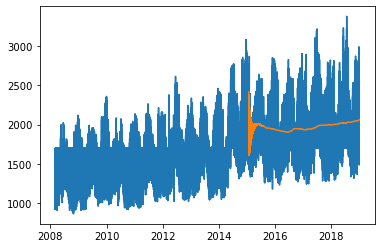

In [67]:
plt.plot(A)
plt.plot(pred_final)

In [68]:
from statsmodels.tsa.ar_model import AR
ar = AR(train_data).fit()
pred1 = ar.predict(end="31-12-2021  23:00:00")

C:\Users\I A T Laptop L.L.C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [69]:
pred1

2009-03-03 08:00:00   -0.076637
2009-03-03 09:00:00    0.014395
2009-03-03 10:00:00   -0.006915
2009-03-03 11:00:00   -0.028898
2009-03-03 12:00:00    0.027157
                         ...   
2021-12-31 19:00:00    0.029572
2021-12-31 20:00:00    0.029572
2021-12-31 21:00:00    0.029572
2021-12-31 22:00:00    0.029572
2021-12-31 23:00:00    0.029572
Freq: H, Length: 112480, dtype: float64

# Prediction for 2019-2021

In [70]:
T = LGRM[LGRM.energy.isna()==False]

In [71]:
ar = AR(T).fit()
pred2 = ar.predict(end="31-12-2021  23:00:00")

C:\Users\I A T Laptop L.L.C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [72]:
pred2

2009-03-03 16:00:00    7.226139
2009-03-03 17:00:00    7.226184
2009-03-03 18:00:00    7.226228
2009-03-03 19:00:00    7.226265
2009-03-03 20:00:00    7.226300
                         ...   
2021-12-31 19:00:00    7.706735
2021-12-31 20:00:00    7.706739
2021-12-31 21:00:00    7.706743
2021-12-31 22:00:00    7.706747
2021-12-31 23:00:00    7.706751
Freq: H, Length: 112472, dtype: float64

In [73]:
pred1.head(2)

2009-03-03 08:00:00   -0.076637
2009-03-03 09:00:00    0.014395
Freq: H, dtype: float64

In [74]:
pred2.head(2)

2009-03-03 16:00:00    7.226139
2009-03-03 17:00:00    7.226184
Freq: H, dtype: float64

In [75]:
pred1 = pred1[1:]

In [76]:
pred1

2009-03-03 09:00:00    0.014395
2009-03-03 10:00:00   -0.006915
2009-03-03 11:00:00   -0.028898
2009-03-03 12:00:00    0.027157
2009-03-03 13:00:00    0.066535
                         ...   
2021-12-31 19:00:00    0.029572
2021-12-31 20:00:00    0.029572
2021-12-31 21:00:00    0.029572
2021-12-31 22:00:00    0.029572
2021-12-31 23:00:00    0.029572
Freq: H, Length: 112479, dtype: float64

In [77]:
pred2

2009-03-03 16:00:00    7.226139
2009-03-03 17:00:00    7.226184
2009-03-03 18:00:00    7.226228
2009-03-03 19:00:00    7.226265
2009-03-03 20:00:00    7.226300
                         ...   
2021-12-31 19:00:00    7.706735
2021-12-31 20:00:00    7.706739
2021-12-31 21:00:00    7.706743
2021-12-31 22:00:00    7.706747
2021-12-31 23:00:00    7.706751
Freq: H, Length: 112472, dtype: float64

In [78]:
pred1.shape

(112479,)

In [79]:
final_preds= exp(pred1+pred2)

In [80]:
final_preds.shape

(112479,)

In [81]:
fp =final_preds[86175:]
fp.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [82]:
fp.shape

(26304,)

In [83]:
fp

2019-01-01 00:00:00    2061.726076
2019-01-01 01:00:00    2061.772815
2019-01-01 02:00:00    2061.816357
2019-01-01 03:00:00    2061.857630
2019-01-01 04:00:00    2061.897421
                          ...     
2021-12-31 19:00:00    2290.000849
2021-12-31 20:00:00    2290.009663
2021-12-31 21:00:00    2290.018477
2021-12-31 22:00:00    2290.027291
2021-12-31 23:00:00    2290.036105
Freq: H, Length: 26304, dtype: float64

<AxesSubplot:>

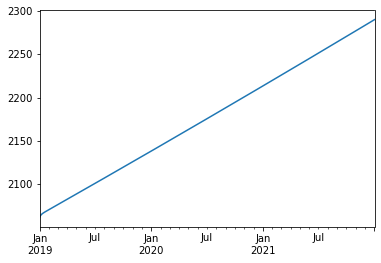

In [84]:
fp.plot()

In [85]:
final_preds.index

DatetimeIndex(['2009-03-03 09:00:00', '2009-03-03 10:00:00',
               '2009-03-03 11:00:00', '2009-03-03 12:00:00',
               '2009-03-03 13:00:00', '2009-03-03 14:00:00',
               '2009-03-03 15:00:00', '2009-03-03 16:00:00',
               '2009-03-03 17:00:00', '2009-03-03 18:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=112479, freq='H')

In [86]:
fp.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [87]:
df = pd.DataFrame(fp)

In [88]:
df.columns = [["energy"]]

In [89]:
df

,energy
2019-01-01 00:00:00,2061.726076
2019-01-01 01:00:00,2061.772815
2019-01-01 02:00:00,2061.816357
2019-01-01 03:00:00,2061.857630
2019-01-01 04:00:00,2061.897421
...,...
2021-12-31 19:00:00,2290.000849
2021-12-31 20:00:00,2290.009663
2021-12-31 21:00:00,2290.018477
2021-12-31 22:00:00,2290.027291


In [90]:
B.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [91]:
df.index = B.row_id

In [92]:
df

,energy
row_id,
94993,2061.726076
94994,2061.772815
94995,2061.816357
94996,2061.857630
94997,2061.897421
...,...
121292,2290.000849
121293,2290.009663
121294,2290.018477


In [93]:
df.to_csv("C:/Users/I A T Laptop L.L.C/Desktop/Final_submission.csv")